In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from qtaim_embed.core.dataset import HeteroGraphNodeLabelDataset
from qtaim_embed.utils.dataset import (
    gather_atom_level_stats, 
    gather_bond_level_stats, 
    print_summary_complete, 
    print_summary_atom_level,
    plot_violin_from_complete_dict,
    plot_violin_from_atom_dict
    
)
from scipy import stats

dev_dataset = "../../../data/splits_1101/train_qm8_qtaim_1025_labelled.pkl"
# read the dataset
#dev_df = pd.read_pickle(dev_dataset)

In [2]:
dataset_dev = HeteroGraphNodeLabelDataset(
    file=dev_dataset,
    standard_scale_features=False,
    standard_scale_targets=False,
    log_scale_features=False,
    log_scale_targets=False,
    allowed_ring_size=[5],
    allowed_charges=None,
    allowed_spins=None,
    self_loop=True,
    debug=False,
    extra_keys={
        "atom": [
            "extra_feat_atom_Lagrangian_K",
            "extra_feat_atom_Hamiltonian_K",
            "extra_feat_atom_e_density",
            "extra_feat_atom_lap_e_density",
            "extra_feat_atom_e_loc_func",
            "extra_feat_atom_ave_loc_ion_E",
            "extra_feat_atom_delta_g_promolecular",
            "extra_feat_atom_delta_g_hirsh",
            "extra_feat_atom_esp_nuc",
            "extra_feat_atom_esp_e",
            "extra_feat_atom_esp_total",
            "extra_feat_atom_grad_norm",
            "extra_feat_atom_lap_norm",
            "extra_feat_atom_eig_hess",
            "extra_feat_atom_det_hessian",
            "extra_feat_atom_ellip_e_dens",
            "extra_feat_atom_eta",
        ],
        "bond": [
            "extra_feat_bond_Lagrangian_K",
            "extra_feat_bond_Hamiltonian_K",
            "extra_feat_bond_e_density",
            "extra_feat_bond_lap_e_density",
            "extra_feat_bond_e_loc_func",
            "extra_feat_bond_ave_loc_ion_E",
            "extra_feat_bond_delta_g_promolecular",
            "extra_feat_bond_delta_g_hirsh",
            "extra_feat_bond_esp_nuc",
            "extra_feat_bond_esp_e",
            "extra_feat_bond_esp_total",
            "extra_feat_bond_grad_norm",
            "extra_feat_bond_lap_norm",
            "extra_feat_bond_eig_hess",
            "extra_feat_bond_det_hessian",
            "extra_feat_bond_ellip_e_dens",
            "extra_feat_bond_eta",
            "bond_length",
        ],
        "global": [],
    },
    target_dict={
        "atom": [
            "extra_feat_atom_Lagrangian_K",
            "extra_feat_atom_Hamiltonian_K",
            "extra_feat_atom_e_density",
            "extra_feat_atom_lap_e_density",
            "extra_feat_atom_e_loc_func",
            "extra_feat_atom_ave_loc_ion_E",
            "extra_feat_atom_delta_g_promolecular",
            "extra_feat_atom_delta_g_hirsh",
            "extra_feat_atom_esp_nuc",
            "extra_feat_atom_esp_e",
            "extra_feat_atom_esp_total",
            "extra_feat_atom_grad_norm",
            "extra_feat_atom_lap_norm",
            "extra_feat_atom_eig_hess",
            "extra_feat_atom_det_hessian",
            "extra_feat_atom_ellip_e_dens",
            "extra_feat_atom_eta",
        ],
        "bond": [
            "extra_feat_bond_Lagrangian_K",
            "extra_feat_bond_Hamiltonian_K",
            "extra_feat_bond_e_density",
            "extra_feat_bond_lap_e_density",
            "extra_feat_bond_e_loc_func",
            "extra_feat_bond_ave_loc_ion_E",
            "extra_feat_bond_delta_g_promolecular",
            "extra_feat_bond_delta_g_hirsh",
            "extra_feat_bond_esp_nuc",
            "extra_feat_bond_esp_e",
            "extra_feat_bond_esp_total",
            "extra_feat_bond_grad_norm",
            "extra_feat_bond_lap_norm",
            "extra_feat_bond_eig_hess",
            "extra_feat_bond_det_hessian",
            "extra_feat_bond_ellip_e_dens",
            "extra_feat_bond_eta",
            "bond_length",
        ],
        "global": [],
    },
    extra_dataset_info={},
)

... > creating MoleculeWrapper objects


100%|██████████| 19189/19189 [00:05<00:00, 3409.66it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'F', 'N', 'O', 'C'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_tot

100%|██████████| 19189/19189 [00:32<00:00, 590.08it/s]


included in labels
{'atom': ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta'], 'bond': ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_total', 'extra_feat_bond_grad_norm', 'extra_feat_bond_lap_norm', 'extra_feat_bond_eig_hess', 'e

100%|██████████| 19189/19189 [00:01<00:00, 13675.44it/s]

original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['atom', 'bond'])
... > loaded dataset


In [3]:
feat_dict_atoms, feat_dict_complete_atoms, feat_dict_summary_atoms = gather_atom_level_stats(dataset_dev)

capturing stats for atom type:  H
capturing stats for atom type:  F
capturing stats for atom type:  N
capturing stats for atom type:  O
capturing stats for atom type:  C


In [4]:
feat_dict_complete_bonds, feat_dict_summary_bonds = gather_bond_level_stats(dataset_dev)

In [23]:
print_summary_complete(feat_dict_summary_bonds)

Lagrangian_K:	 mean: 0.135 std:4.838 min: 0.000 max: 2322.760
Hamiltonian_K:	 mean: 0.344 std:3.457 min: -0.004 max: 1659.586
e_density:	 mean: -0.344 std:3.457 min: -1659.586 max: 0.004
lap_e_density:	 mean: -0.836 std:5.540 min: -2.561 max: 2652.698
e_loc_func:	 mean: 0.888 std:0.163 min: 0.000 max: 0.996
ave_loc_ion_E:	 mean: 0.638 std:0.205 min: 0.265 max: 27.529
delta_g_promolecular:	 mean: 0.339 std:1.320 min: 0.000 max: 633.433
delta_g_hirsh:	 mean: 0.519 std:1.511 min: 0.000 max: 724.296
esp_nuc:	 mean: 18.306 std:2.424 min: 7.019 max: 105.895
esp_e:	 mean: -17.275 std:2.264 min: -40.519 max: -6.473
esp_total:	 mean: 1.031 std:0.478 min: -0.073 max: 65.377
grad_norm:	 mean: 0.000 std:0.000 min: 0.000 max: 0.000
lap_norm:	 mean: -0.836 std:5.540 min: -2.561 max: 2652.698
eig_hess:	 mean: -0.836 std:5.540 min: -2.561 max: 2652.698
det_hessian:	 mean: 2302626.750 std:1106198016.000 min: 0.000 max: 531427753984.000
ellip_e_dens:	 mean: 0.090 std:0.235 min: 0.000 max: 21.488
eta:	 m

In [22]:
print_summary_complete(feat_dict_complete_atoms)

Lagrangian_K:	 mean: 10.663 std:20.929 min: 0.000 max: 508.400
Hamiltonian_K:	 mean: 207100.734 std:317776.562 min: 3.001 max: 2098286.000
e_density:	 mean: -207100.734 std:317776.562 min: -2098286.000 max: -3.001
lap_e_density:	 mean: -828360.250 std:1271024.250 min: -8392426.000 max: -11.997
e_loc_func:	 mean: 1.000 std:0.000 min: 0.996 max: 1.000
ave_loc_ion_E:	 mean: 5.950 std:6.078 min: 0.189 max: 23.967
delta_g_promolecular:	 mean: 0.085 std:0.254 min: 0.000 max: 101.017
delta_g_hirsh:	 mean: 0.139 std:0.368 min: 0.000 max: 155.155
esp_nuc:	 mean: 2237972.750 std:70882824.000 min: 27.832 max: 33130555392.000
esp_e:	 mean: -20.695 std:8.066 min: -43.177 max: -3.980
esp_total:	 mean: 2237952.500 std:70882824.000 min: 19.600 max: 33130555392.000
grad_norm:	 mean: 0.000 std:0.000 min: 0.000 max: 0.000
lap_norm:	 mean: -828360.250 std:1271024.250 min: -8392426.000 max: -11.997
eig_hess:	 mean: -828360.250 std:1271024.250 min: -8392426.000 max: -11.997
det_hessian:	 mean: -330989971039

/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [21]:
print_summary_atom_level(feat_dict_summary_atoms)

H
Lagrangian_K:	 mean: 0.009 std:0.005 min: 0.000 max: 0.060
Hamiltonian_K:	 mean: 6.413 std:0.161 min: 3.001 max: 12.043
e_density:	 mean: -6.413 std:0.161 min: -12.043 max: -3.001
lap_e_density:	 mean: -25.619 std:0.662 min: -47.933 max: -11.997
e_loc_func:	 mean: 1.000 std:0.000 min: 0.996 max: 1.000
ave_loc_ion_E:	 mean: 0.494 std:0.049 min: 0.189 max: 0.747
delta_g_promolecular:	 mean: 0.119 std:0.028 min: 0.000 max: 0.442
delta_g_hirsh:	 mean: 0.207 std:0.044 min: 0.000 max: 1.251
esp_nuc:	 mean: 47.255 std:84.823 min: 27.832 max: 28748.389
esp_e:	 mean: -13.139 std:1.062 min: -17.081 max: -3.980
esp_total:	 mean: 34.115 std:84.857 min: 19.600 max: 28744.408
grad_norm:	 mean: 0.000 std:0.000 min: 0.000 max: 0.000
lap_norm:	 mean: -25.619 std:0.662 min: -47.933 max: -11.997
eig_hess:	 mean: -25.619 std:0.662 min: -47.933 max: -11.997
det_hessian:	 mean: -622.217 std:47.579 min: -4024.375 max: -63.954
ellip_e_dens:	 mean: 0.001 std:0.001 min: 0.000 max: 0.028
eta:	 mean: -1.097 std

In [19]:
atoms_in = [
    i.split("_")[-1]
    for i in dataset_dev.exclude_names["atom"]
    if "chemical_symbol_" in i
]
atoms_in

['O', 'C', 'N', 'F', 'H']

In [8]:
dataset_dev.include_names
atom_feats_qtaim = [
    i[16:] for i in dataset_dev.include_names["atom"] if "extra_feat_atom_" in i
]
atom_feats_qtaim

['Lagrangian_K',
 'Hamiltonian_K',
 'e_density',
 'lap_e_density',
 'e_loc_func',
 'ave_loc_ion_E',
 'delta_g_promolecular',
 'delta_g_hirsh',
 'esp_nuc',
 'esp_e',
 'esp_total',
 'grad_norm',
 'lap_norm',
 'eig_hess',
 'det_hessian',
 'ellip_e_dens',
 'eta']

In [9]:
dict_summary_stats = {"atom": {}, "bond": {}}
dict_histograms = {"atom": {}, "bond": {}}

In [10]:
feat_dict_atoms
feat_dict_complete_atoms
feat_dict_complete_bonds

{'extra_feat_bond_Lagrangian_K': array([0.04132511, 0.04114268, 0.09123591, ..., 0.14681499, 0.09436851,
        0.03707411], dtype=float32),
 'extra_feat_bond_Hamiltonian_K': array([0.28597236, 0.28652143, 0.2113258 , ..., 0.27007997, 0.22440182,
        0.29132253], dtype=float32),
 'extra_feat_bond_e_density': array([-0.28597236, -0.28652143, -0.2113258 , ..., -0.27007997,
        -0.22440182, -0.29132253], dtype=float32),
 'extra_feat_bond_lap_e_density': array([-0.978589  , -0.981515  , -0.48035955, ..., -0.49306002,
        -0.5201332 , -1.0169936 ], dtype=float32),
 'extra_feat_bond_e_loc_func': array([0.98600614, 0.98619133, 0.89571774, ..., 0.810586  , 0.89716685,
        0.98924595], dtype=float32),
 'extra_feat_bond_ave_loc_ion_E': array([0.49802235, 0.49738073, 0.573154  , ..., 0.67375064, 0.592363  ,
        0.5032985 ], dtype=float32),
 'extra_feat_bond_delta_g_promolecular': array([0.30166817, 0.3022426 , 0.32073218, ..., 0.33958754, 0.3209867 ,
        0.30648795], dtyp

/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


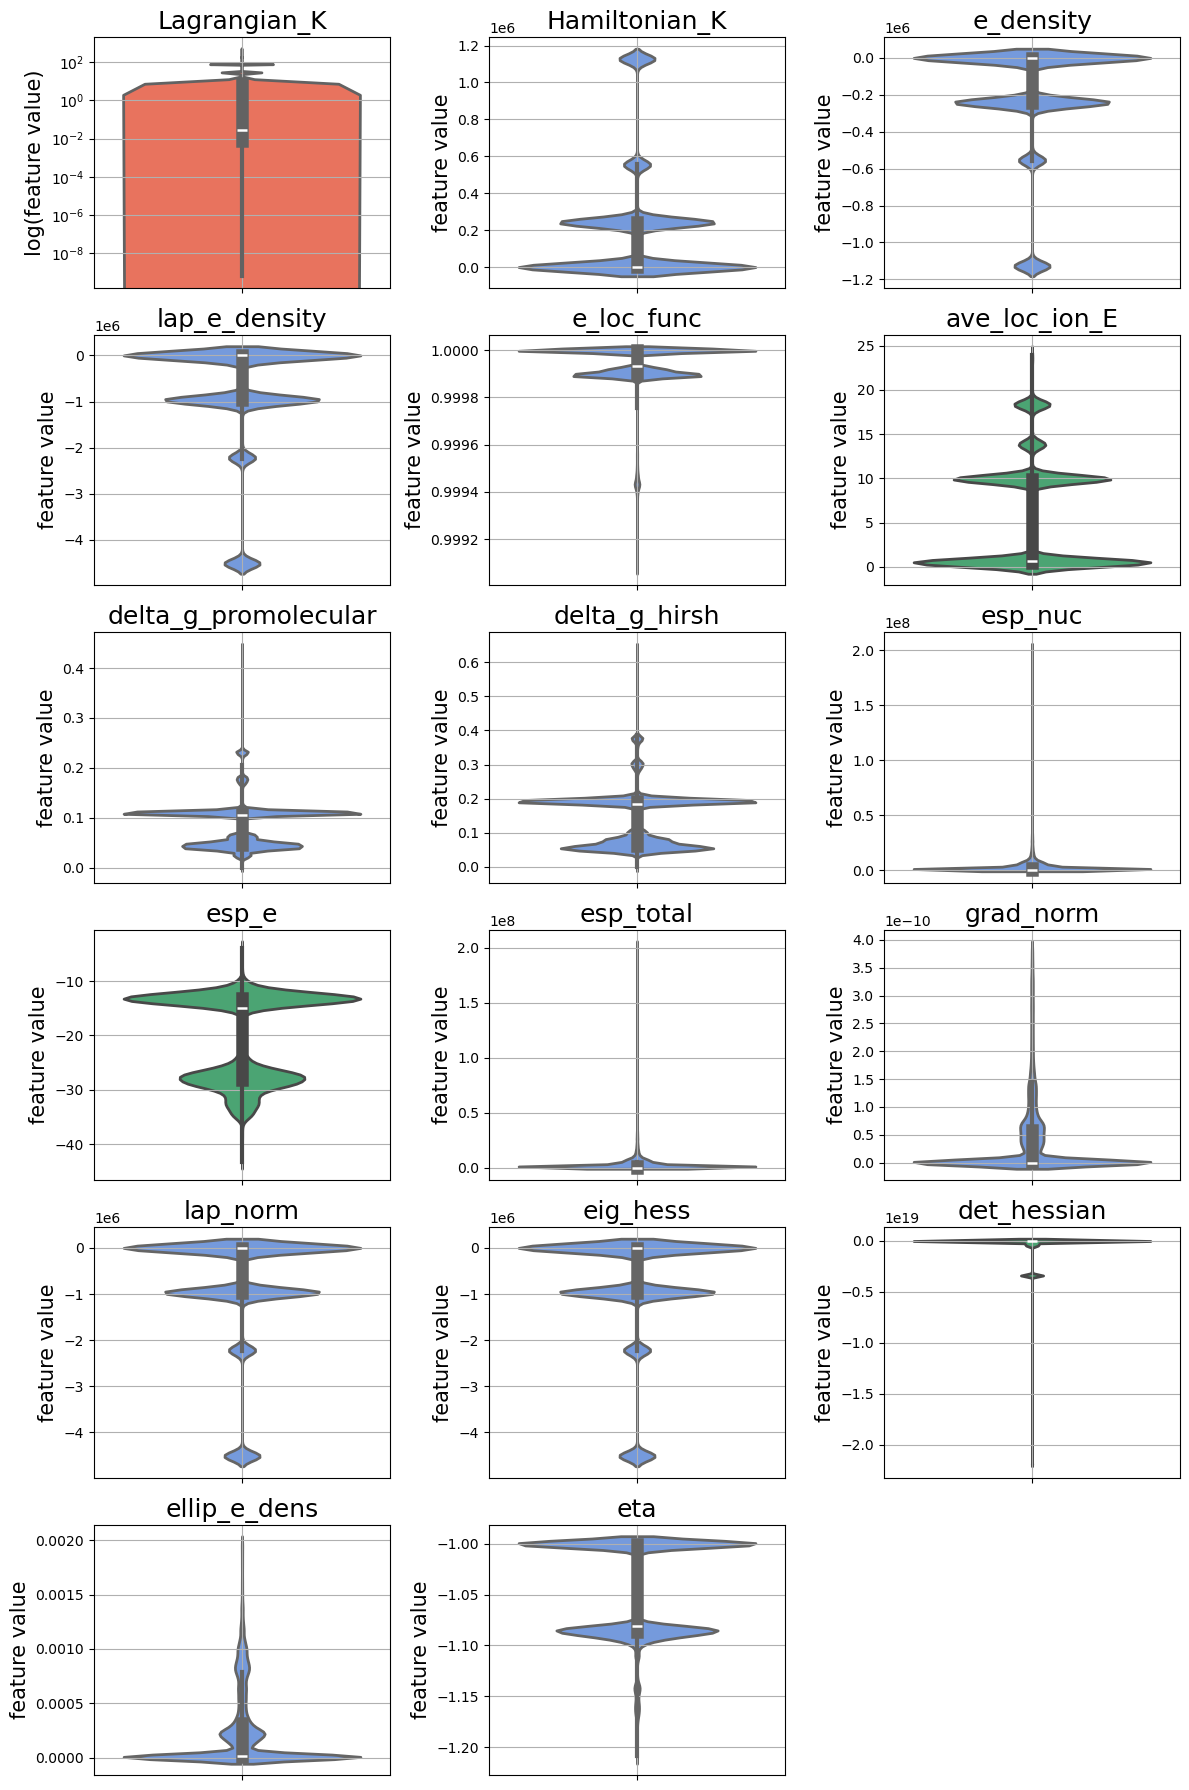

In [11]:
# iterate over each feature and make a violin plot in each subplot
plot_violin_from_complete_dict(feat_dict_complete_atoms, plot_per_row=3, line_width=2, name="violin_plots_atoms.png")

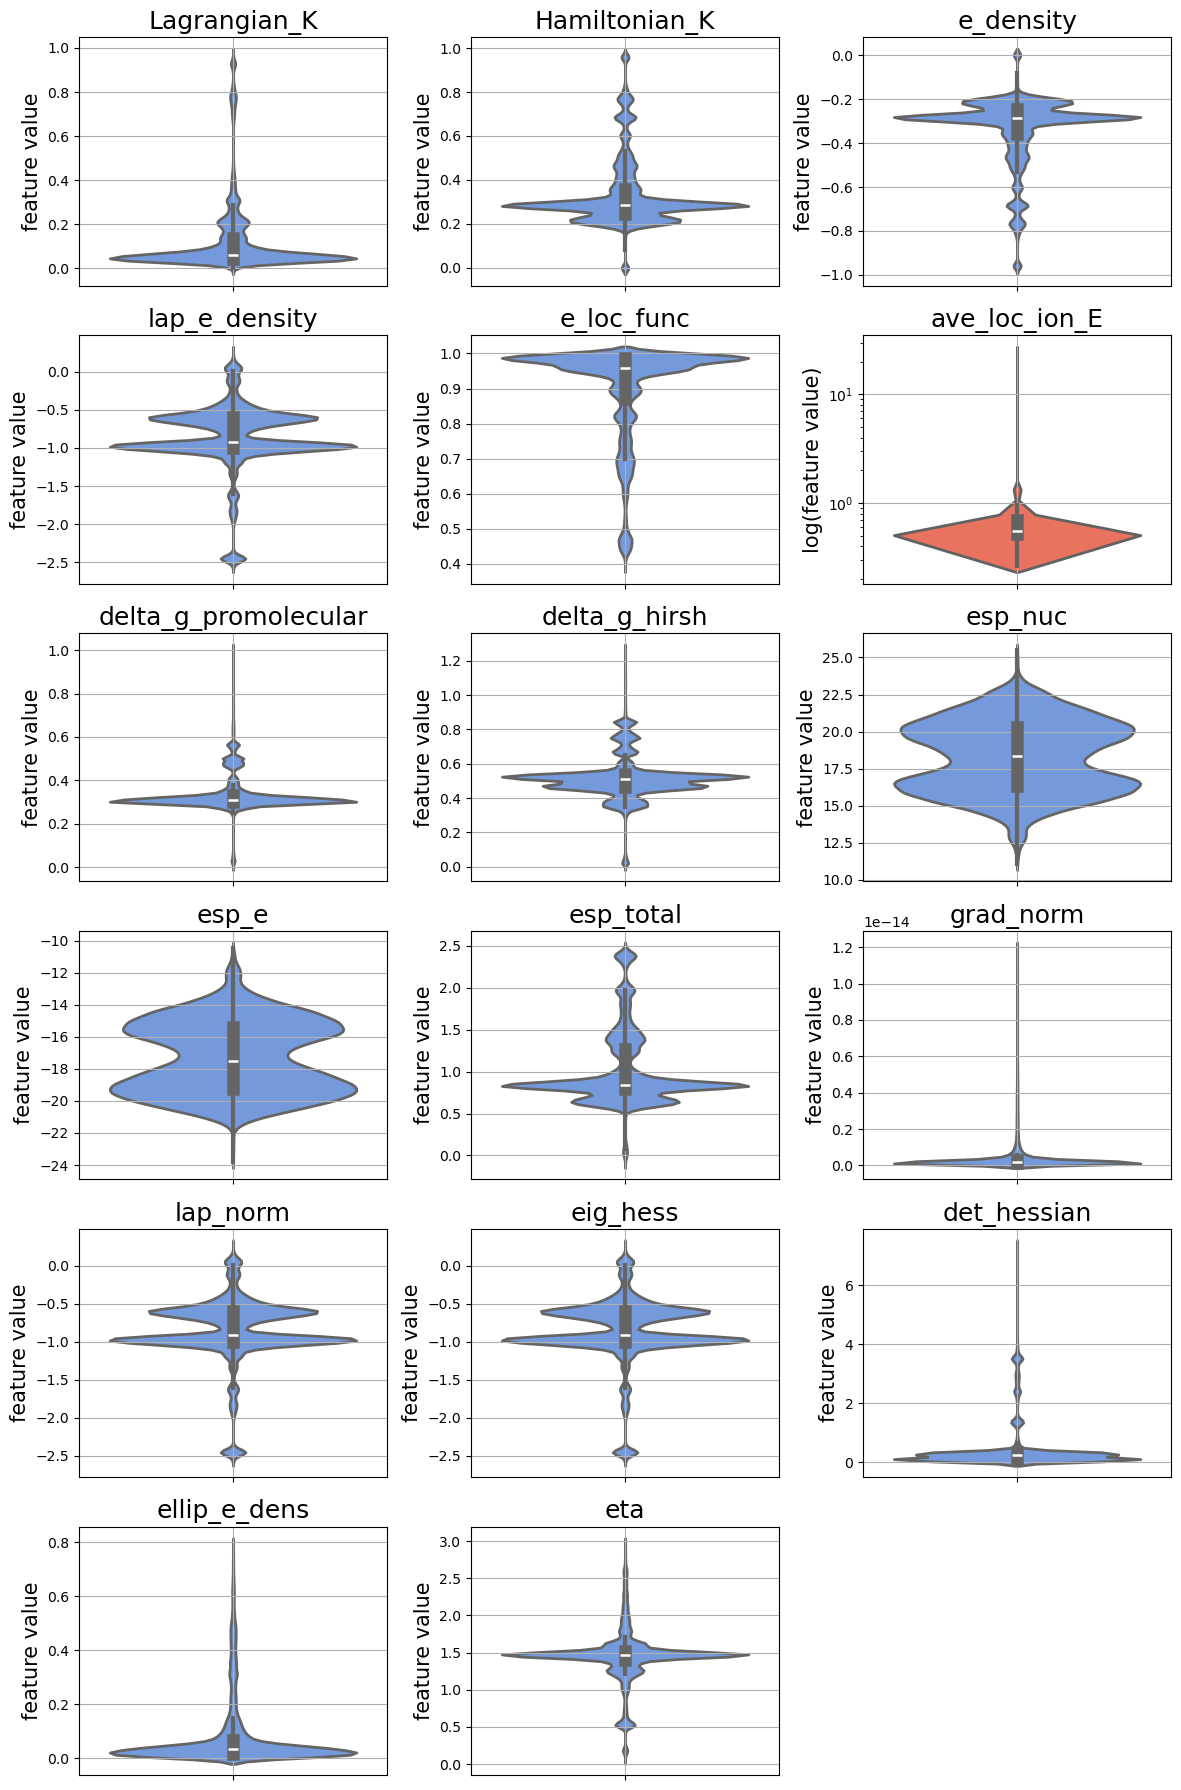

In [20]:
plot_violin_from_complete_dict(feat_dict_complete_bonds, plot_per_row=3, line_width=2, name="violin_plots_bonds.png")

In [24]:
list(feat_dict_atoms.keys())

['H', 'F', 'N', 'O', 'C']

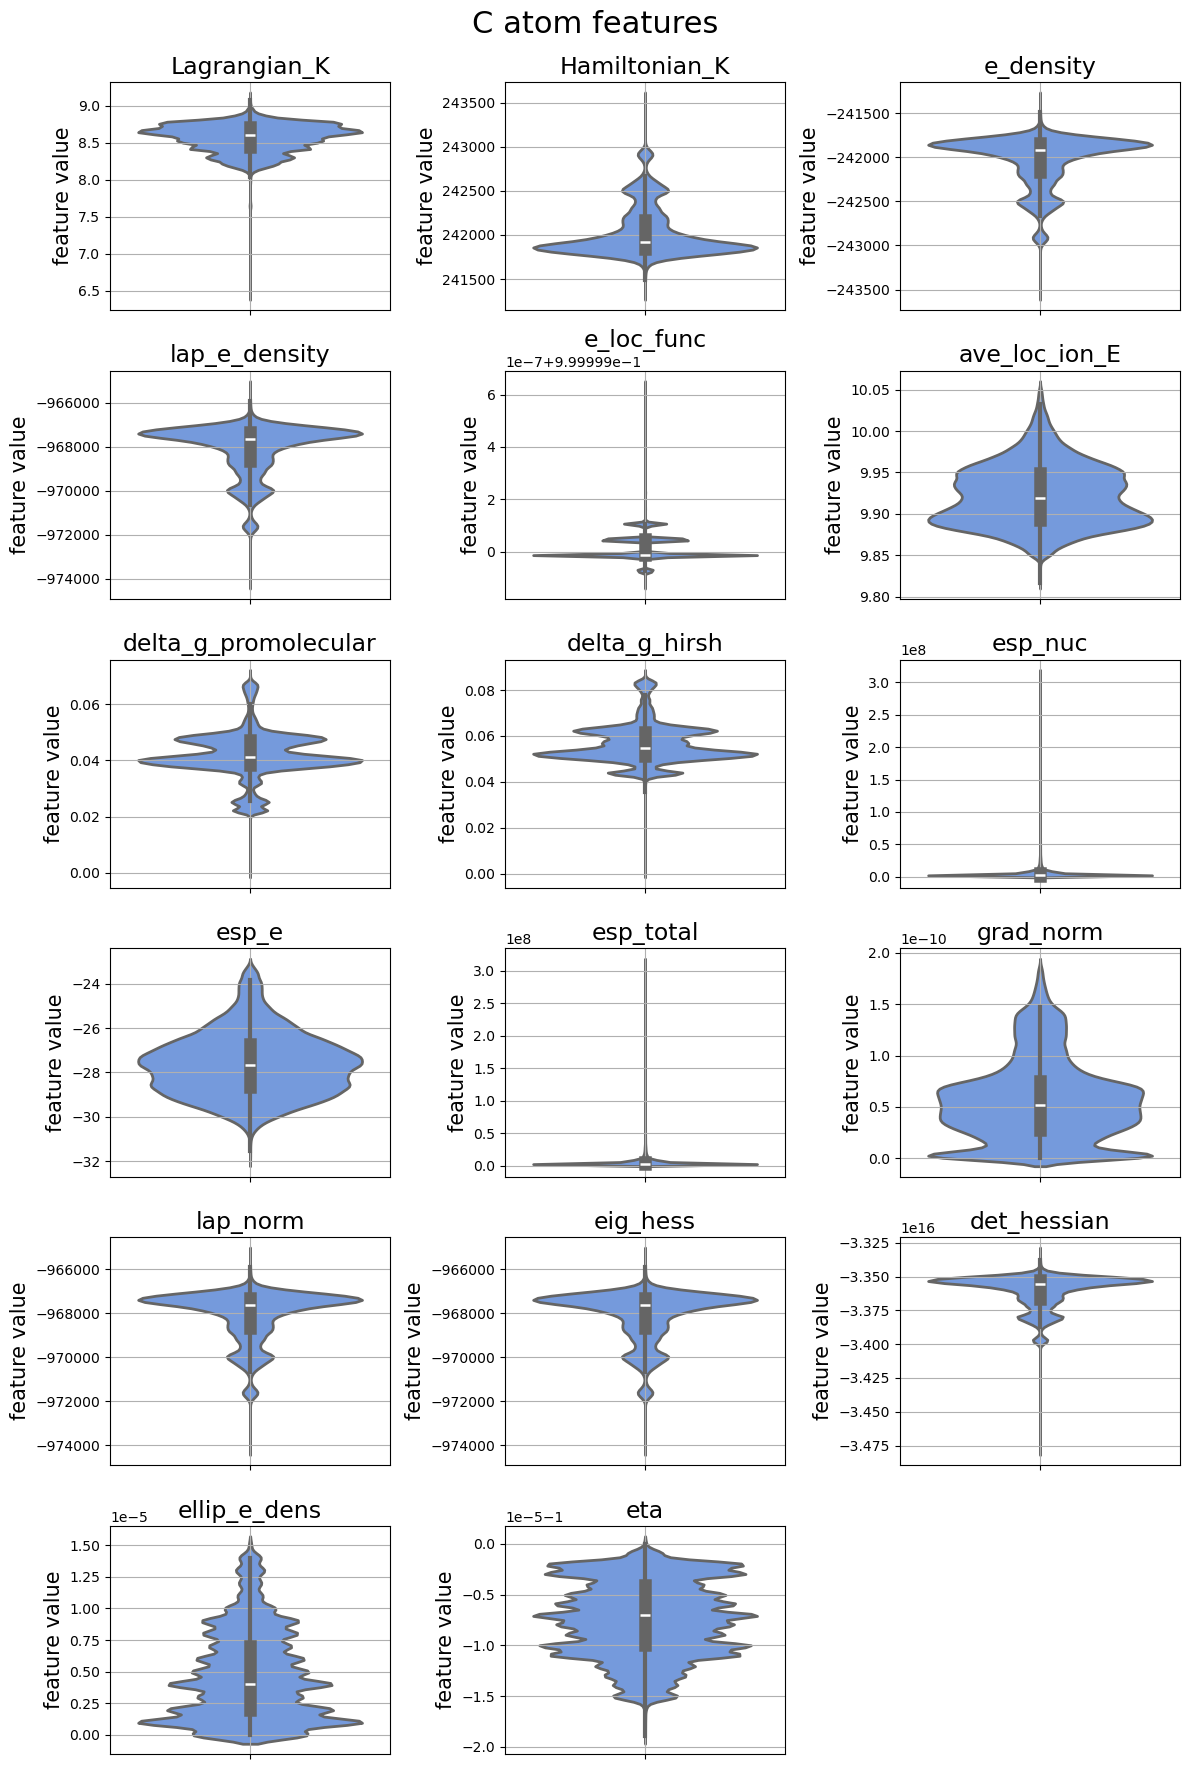

In [14]:
plot_violin_from_atom_dict(feat_dict_atoms, "C", plot_per_row=3, line_width=2)

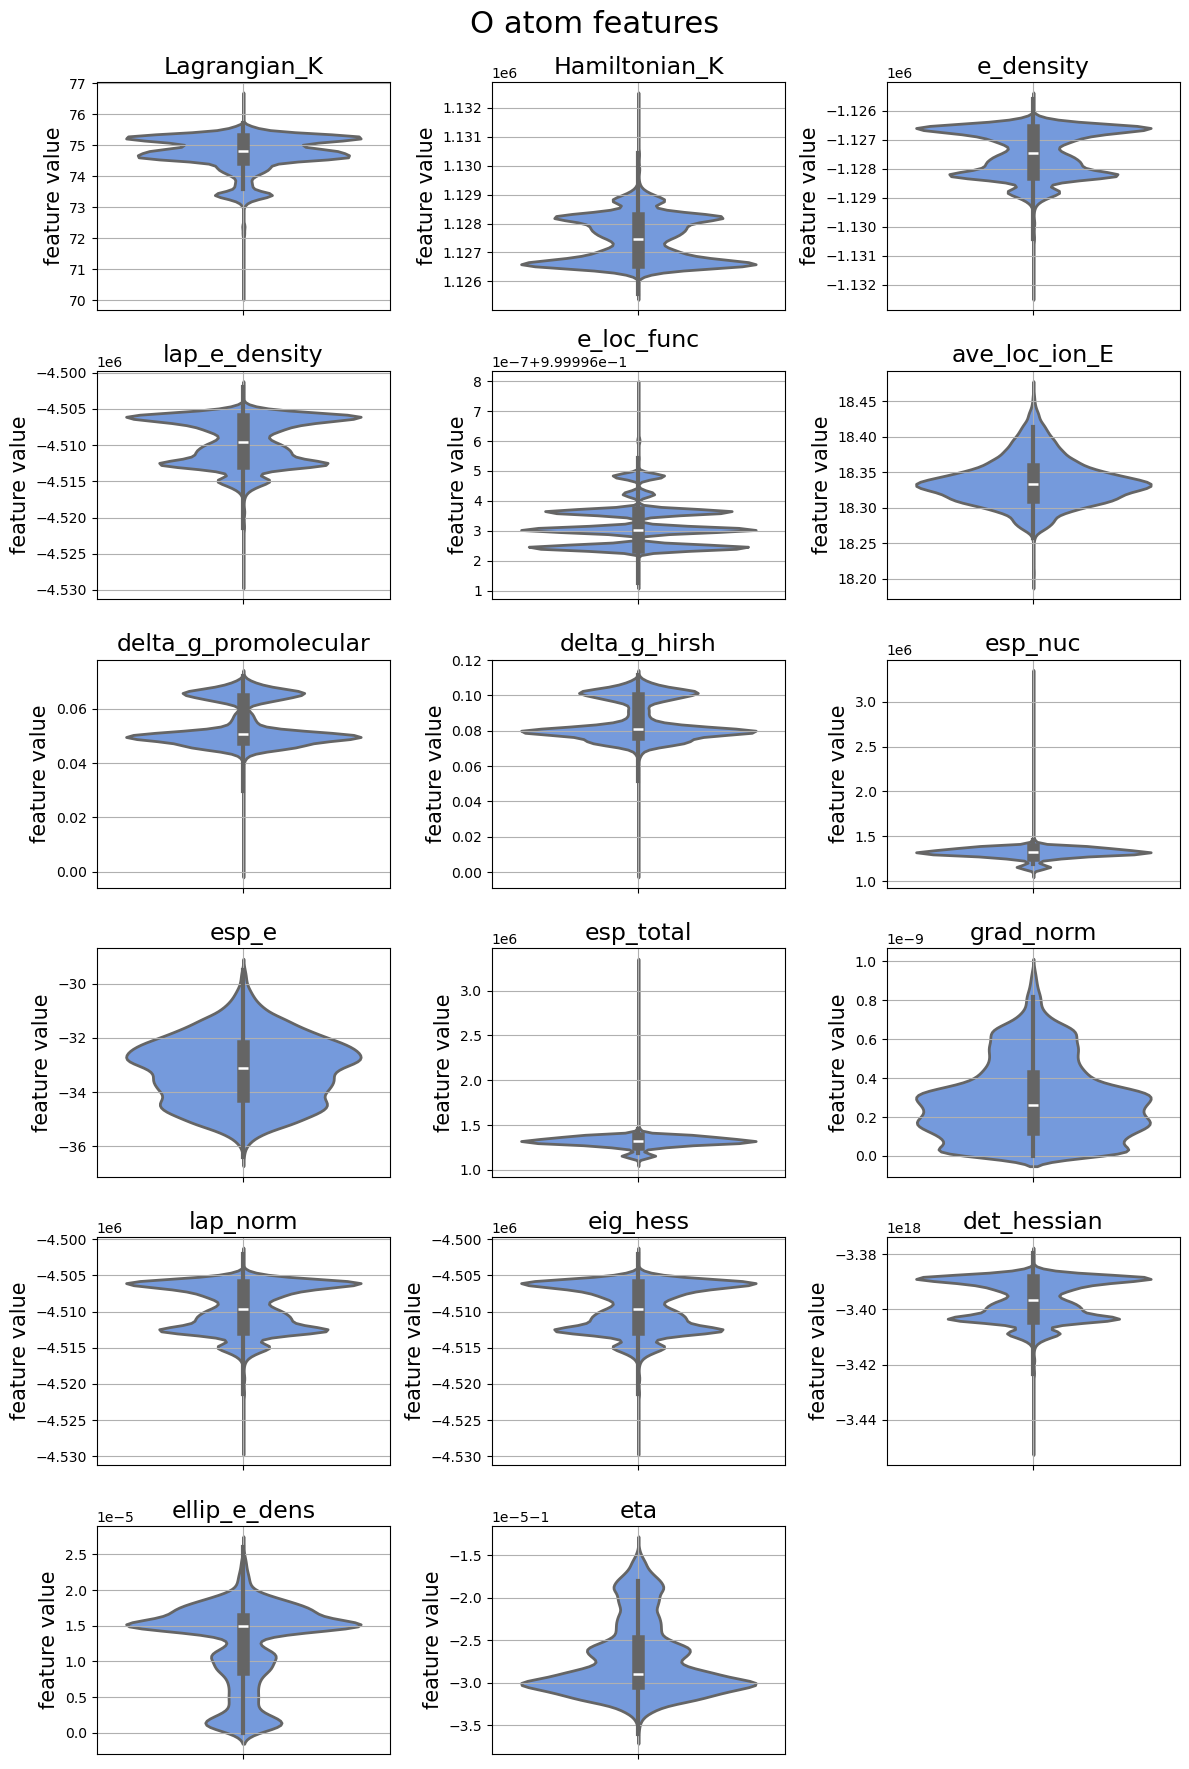

In [15]:
plot_violin_from_atom_dict(feat_dict_atoms, "O", plot_per_row=3, line_width=2)

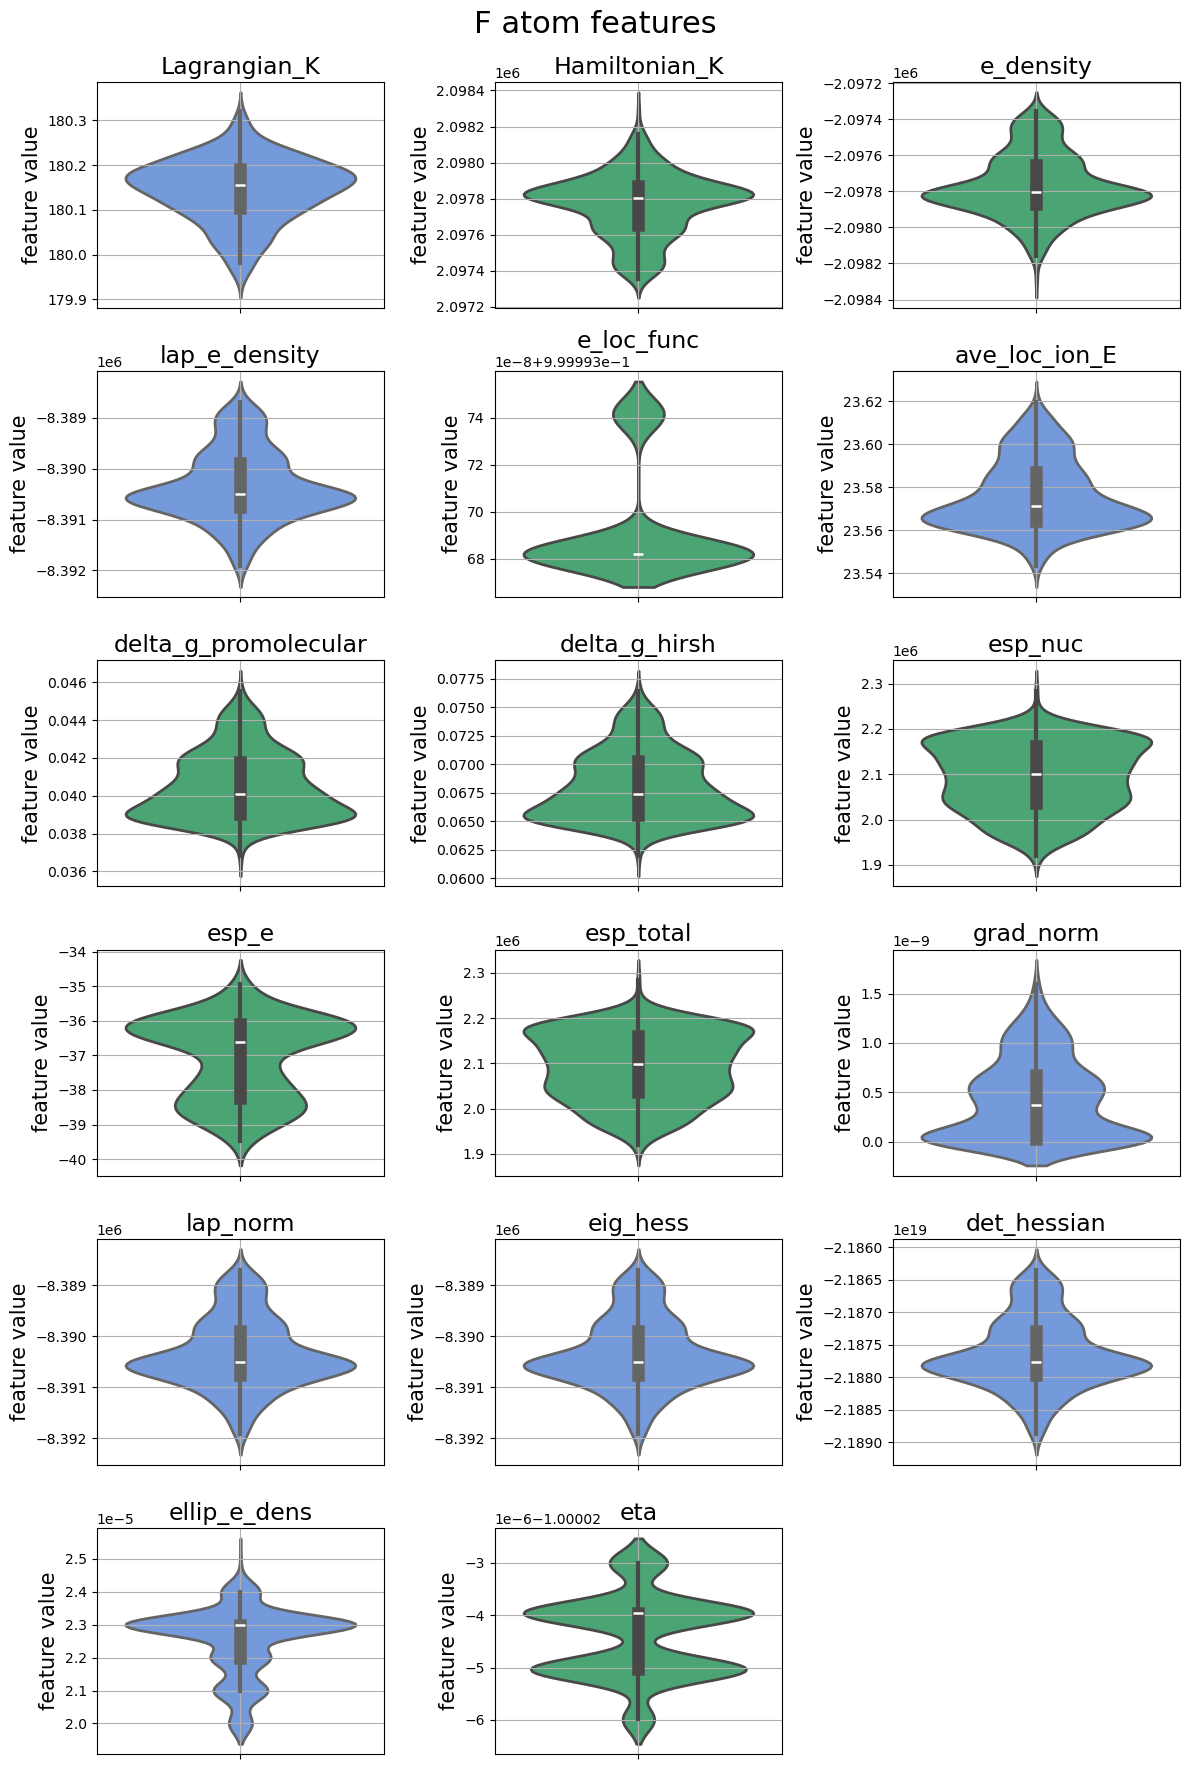

In [16]:
plot_violin_from_atom_dict(feat_dict_atoms, "F", plot_per_row=3, line_width=2)

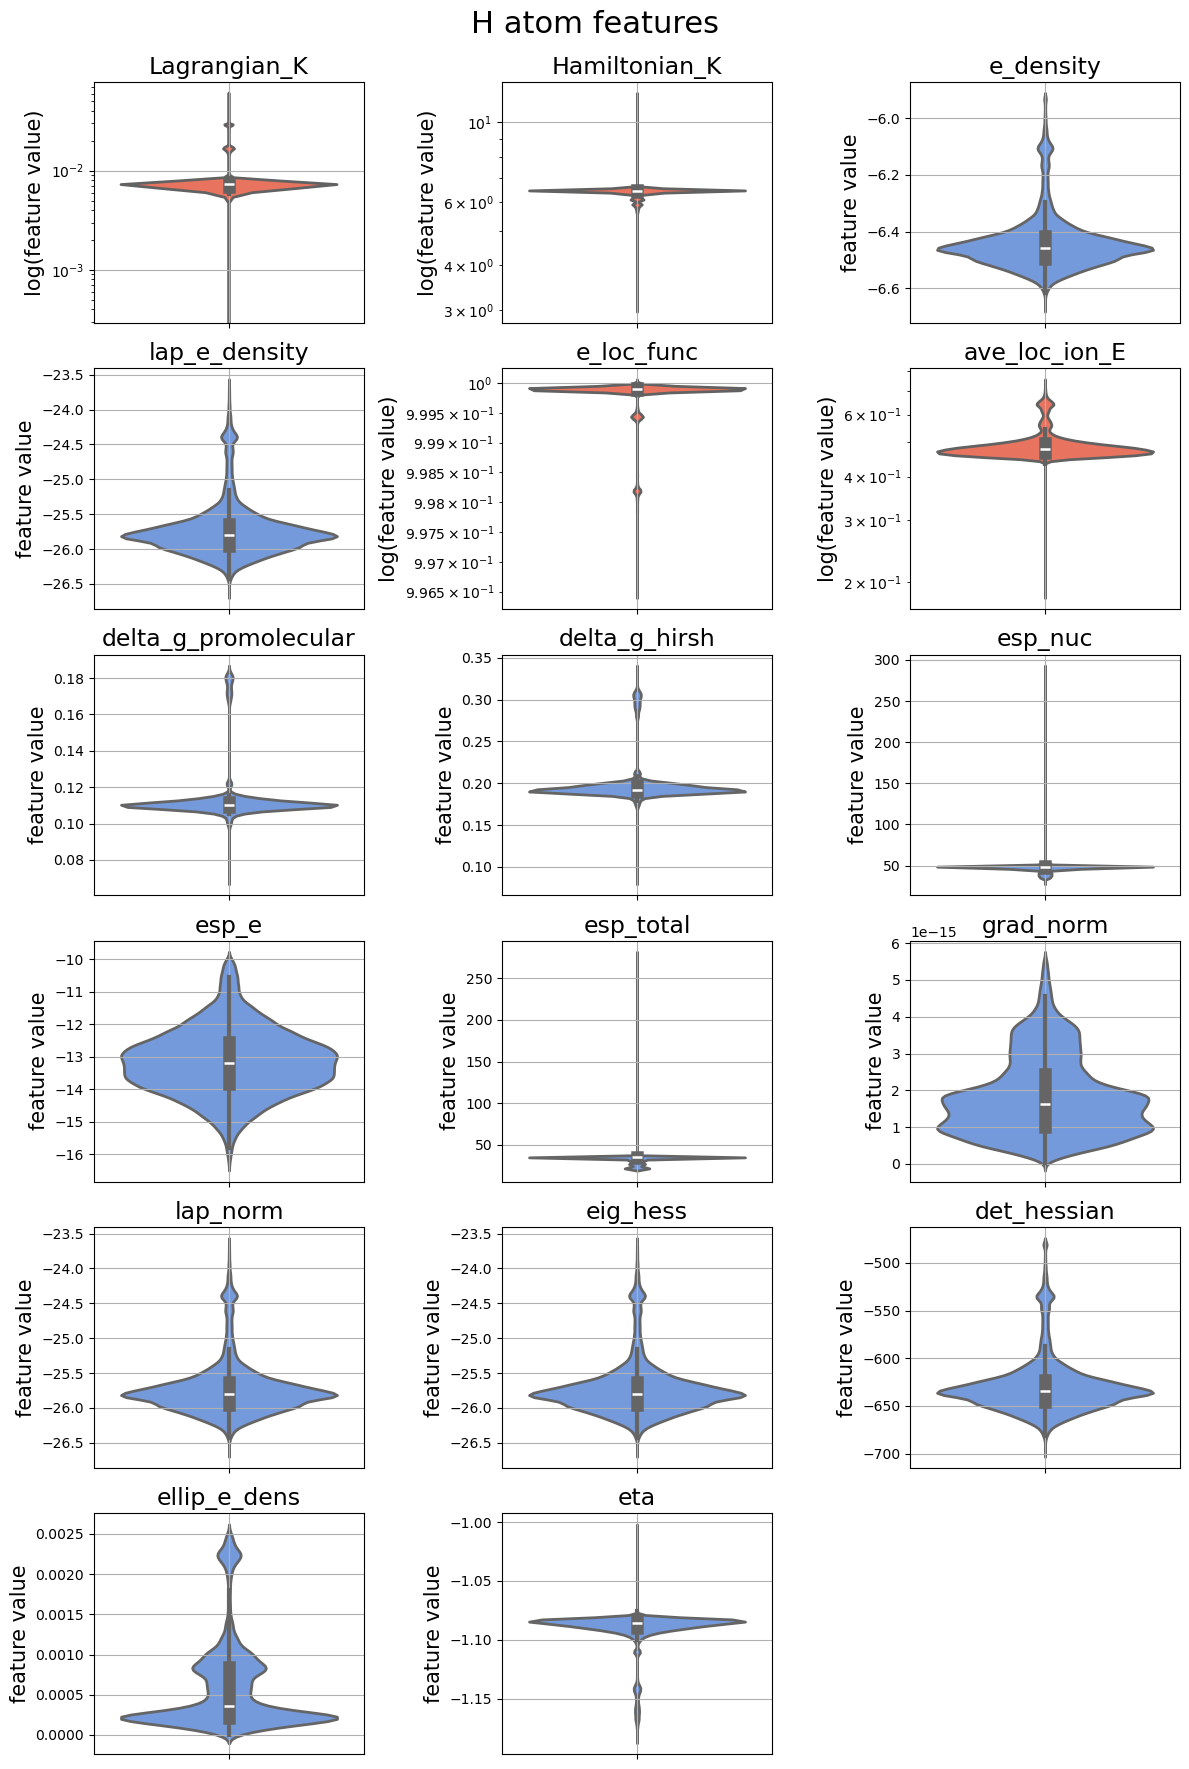

In [17]:
plot_violin_from_atom_dict(feat_dict_atoms, "H", plot_per_row=3, line_width=2)

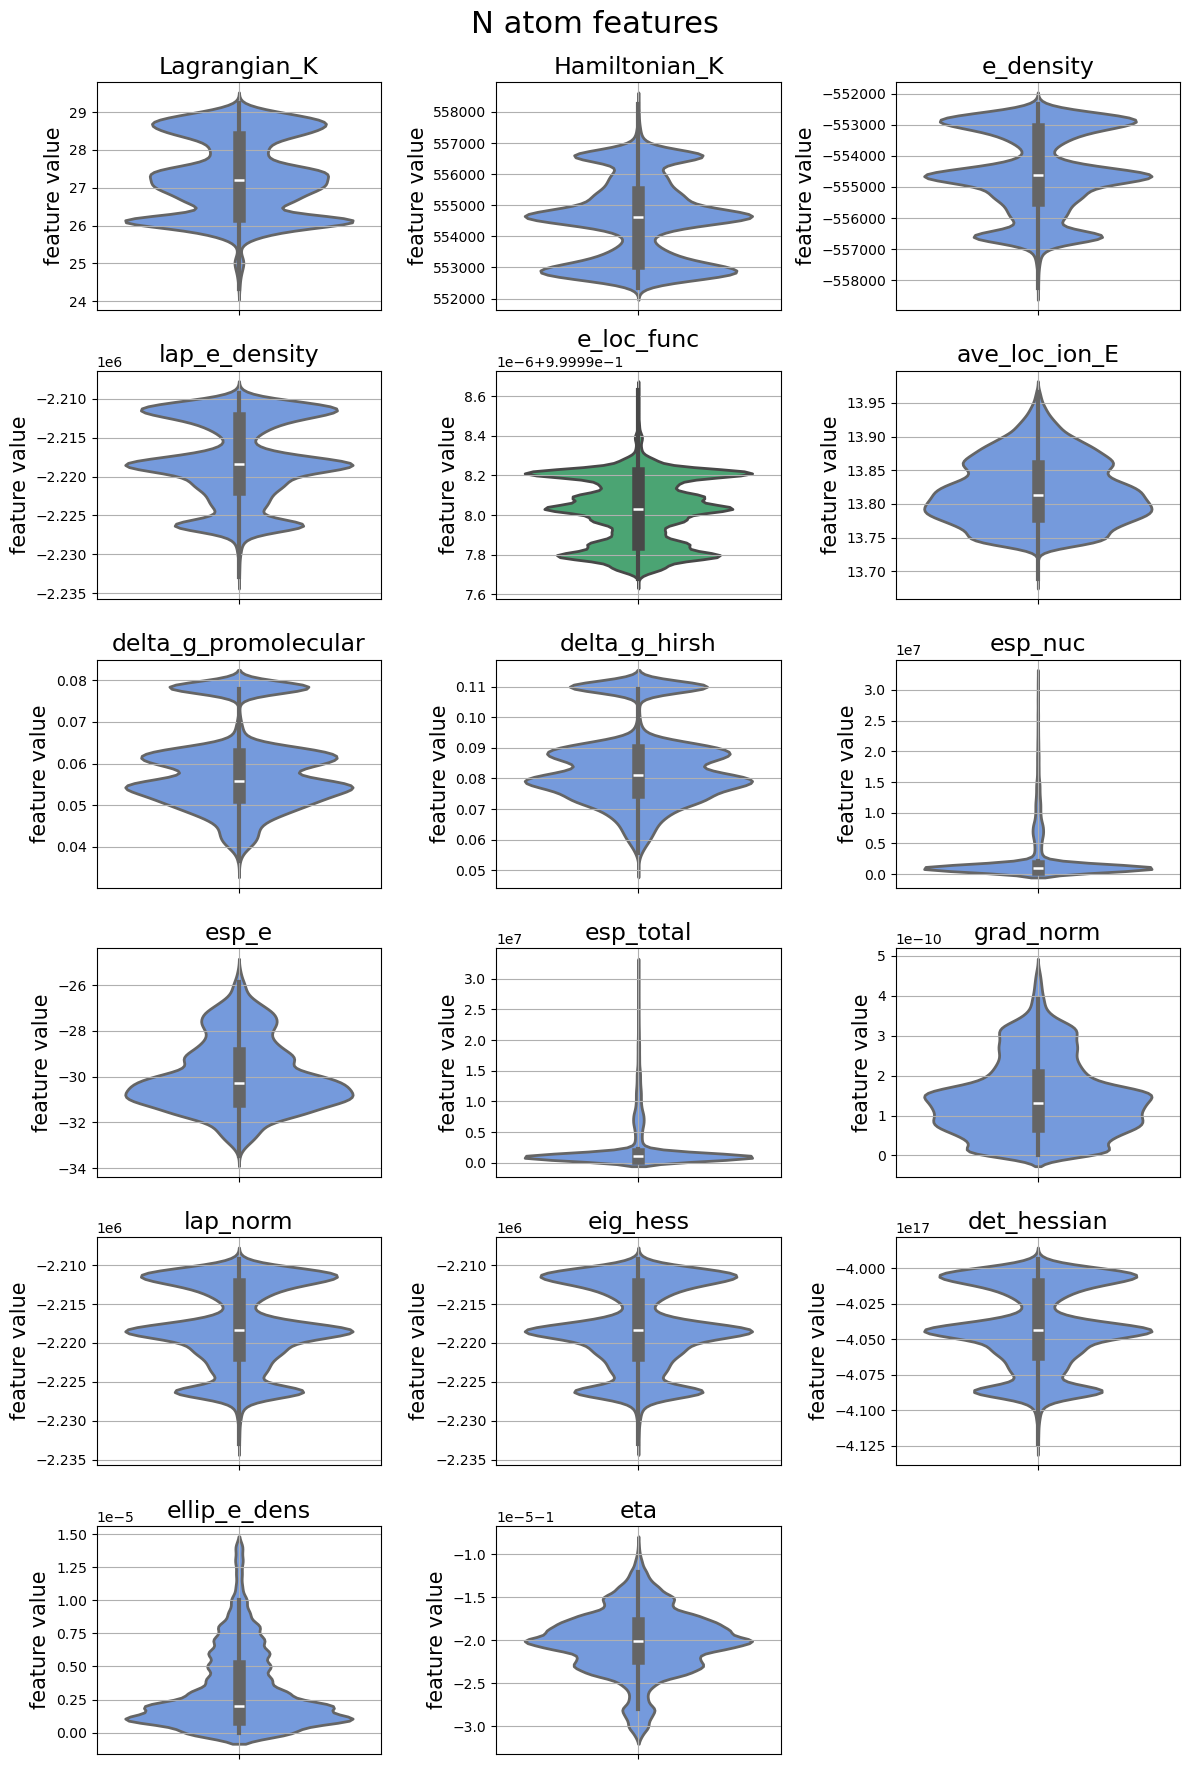

In [18]:
plot_violin_from_atom_dict(feat_dict_atoms, "N", plot_per_row=3, line_width=2)